<a href="https://colab.research.google.com/github/srujank1995/Colab_Repo/blob/main/EDA_Flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#imported all liberaries


## **Highlight of Dataset**

In [204]:
df = pd.read_excel('/content/flight_price.xlsx')
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [205]:
df_copy = df.copy(deep=False)
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# **Drop Arrival Time with Hour & Min**

In [206]:
df_copy['Arrival_Time'] = df_copy['Arrival_Time'].apply(lambda x:x.split(' ')[0])

df_copy["hour"] = df_copy['Arrival_Time'].str.split(':').str[0]
df_copy["min"] = df_copy['Arrival_Time'].str.split(':').str[1]

df_copy['hour'] = df_copy['hour'].astype(int)
df_copy['min'] = df_copy['min'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [207]:
df_copy.drop('Arrival_Time', inplace=True,axis=1)
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,hour,min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35


# **Drop Date_of_Journey column with Date / Month/ Year**

In [208]:
df_copy['Date'] = df_copy['Date_of_Journey'].str.split('/').str[0]
df_copy['Month'] = df_copy['Date_of_Journey'].str.split('/').str[1]
df_copy['year'] = df_copy['Date_of_Journey'].str.split('/').str[2]

In [209]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,hour,min,Date,Month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35,01,03,2019


In [210]:
df_copy['Date'] = df_copy['Date'].astype(int)
df_copy['Month'] = df_copy['Month'].astype(int)
df_copy['year'] = df_copy['year'].astype(int)

df_copy.drop('Date_of_Journey', inplace=True, axis=1)
df_copy.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,hour,min,Date,Month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35,1,3,2019


In [211]:
df_copy.info()
df_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   hour             10683 non-null  int64 
 10  min              10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  year             10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,hour,min,Date,Month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35,1,3,2019


# Drop column **Additional_Info**

In [212]:
df_copy.drop('Additional_Info', inplace=True, axis=1)
df_copy.drop('Route', inplace=True, axis=1)

In [213]:
df_copy.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,hour,min,Date,Month,year
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,3897,1,10,24,3,2019
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,13,15,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,13882,4,25,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,23,30,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,21,35,1,3,2019


In [214]:
df_copy['Dep_Hour'] = df_copy['Dep_Time'].str.split(':').str[0]
df_copy['Dep_Min'] = df_copy['Dep_Time'].str.split(':').str[1]

df_copy['Dep_Hour'] = df_copy['Dep_Hour'].astype(int)
df_copy['Dep_Min'] = df_copy['Dep_Min'].astype(int)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      10683 non-null  object
 1   Source       10683 non-null  object
 2   Destination  10683 non-null  object
 3   Dep_Time     10683 non-null  object
 4   Duration     10683 non-null  object
 5   Total_Stops  10682 non-null  object
 6   Price        10683 non-null  int64 
 7   hour         10683 non-null  int64 
 8   min          10683 non-null  int64 
 9   Date         10683 non-null  int64 
 10  Month        10683 non-null  int64 
 11  year         10683 non-null  int64 
 12  Dep_Hour     10683 non-null  int64 
 13  Dep_Min      10683 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [215]:
df_copy.drop('Dep_Time',inplace=True, axis =1)

In [216]:
df_copy.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,hour,min,Date,Month,year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,1,10,24,3,2019,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,13,15,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,4,25,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,23,30,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,21,35,1,3,2019,16,50


# **Convert Duration into Hours / Min **

In [218]:
import re

# Extract hours
df_copy['Duration_Hour'] = df_copy['Duration'].str.extract(r'(\d+)h')
df_copy['Duration_Hour'] = df_copy['Duration_Hour'].fillna(0).astype(int)

# Extract minutes
df_copy['Duration_Min'] = df_copy['Duration'].str.extract(r'(\d+)m')
df_copy['Duration_Min'] = df_copy['Duration_Min'].fillna(0).astype(int)

df_copy.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,hour,min,Date,Month,year,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,1,10,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,13,15,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,4,25,9,6,2019,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,23,30,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,21,35,1,3,2019,16,50,4,45


In [219]:
df_copy.drop('Duration', inplace=True, axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10683 non-null  object
 1   Source         10683 non-null  object
 2   Destination    10683 non-null  object
 3   Total_Stops    10682 non-null  object
 4   Price          10683 non-null  int64 
 5   hour           10683 non-null  int64 
 6   min            10683 non-null  int64 
 7   Date           10683 non-null  int64 
 8   Month          10683 non-null  int64 
 9   year           10683 non-null  int64 
 10  Dep_Hour       10683 non-null  int64 
 11  Dep_Min        10683 non-null  int64 
 12  Duration_Hour  10683 non-null  int64 
 13  Duration_Min   10683 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 1.1+ MB


In [220]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [221]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [224]:
df_copy['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [227]:
df_copy['Total_Stops'] = df_copy['Total_Stops'].map({
    'non-stop':0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4,
     np.nan: 1,
})

df_copy.head(2)

,Airline,Source,Destination,Total_Stops,Price,hour,min,Date,Month,year,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,1,10,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,13,15,1,5,2019,5,50,7,25


In [229]:
df_copy.head()

,Airline,Source,Destination,Total_Stops,Price,hour,min,Date,Month,year,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,1,10,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,13,15,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,4,25,9,6,2019,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,23,30,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,21,35,1,3,2019,16,50,4,45


Visualizing numerical features:


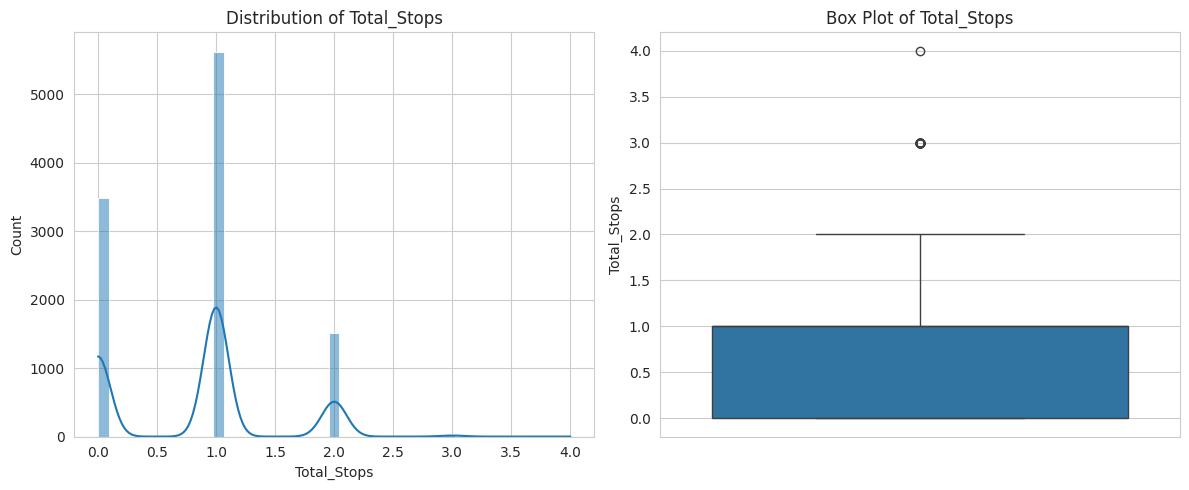

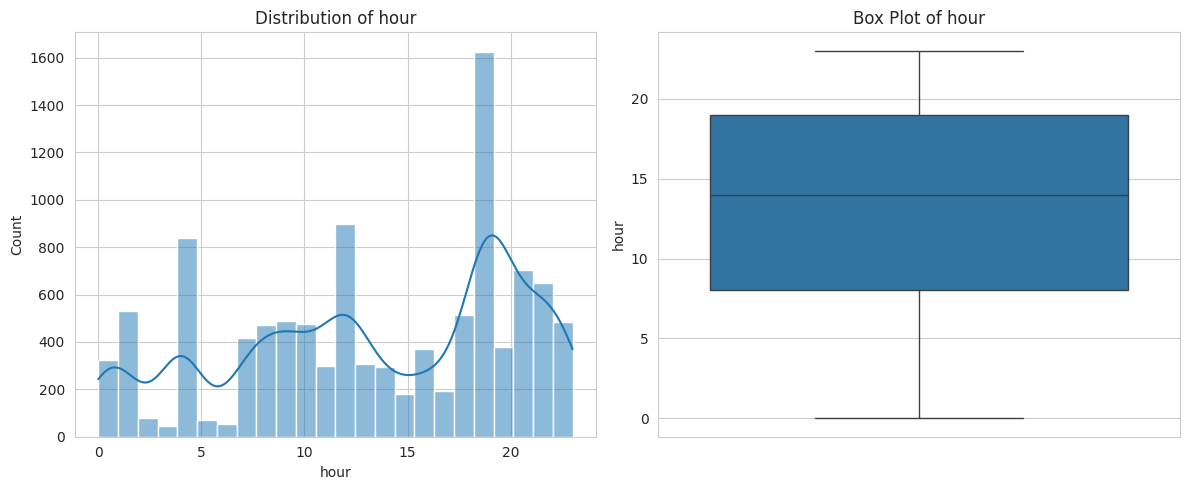

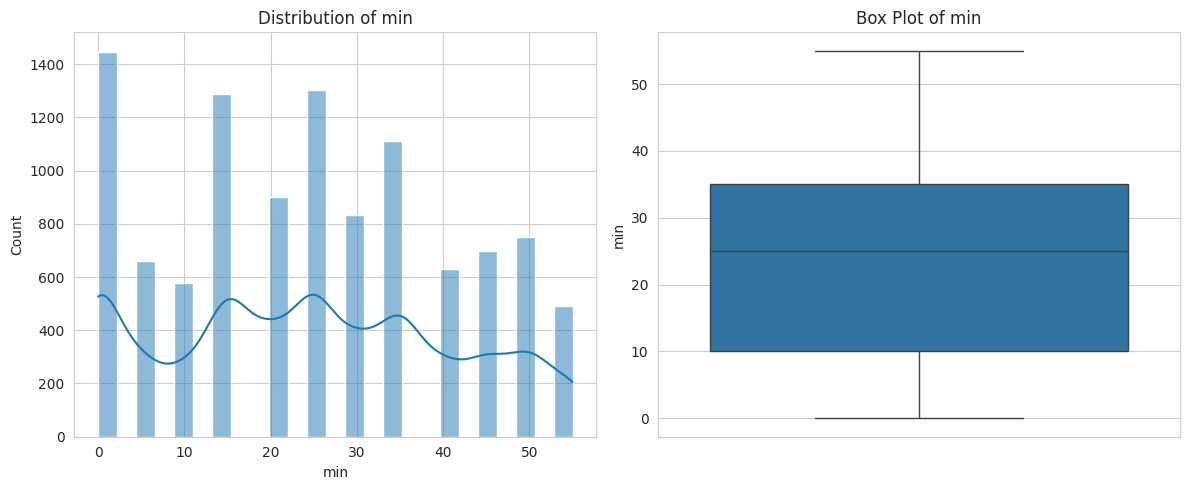

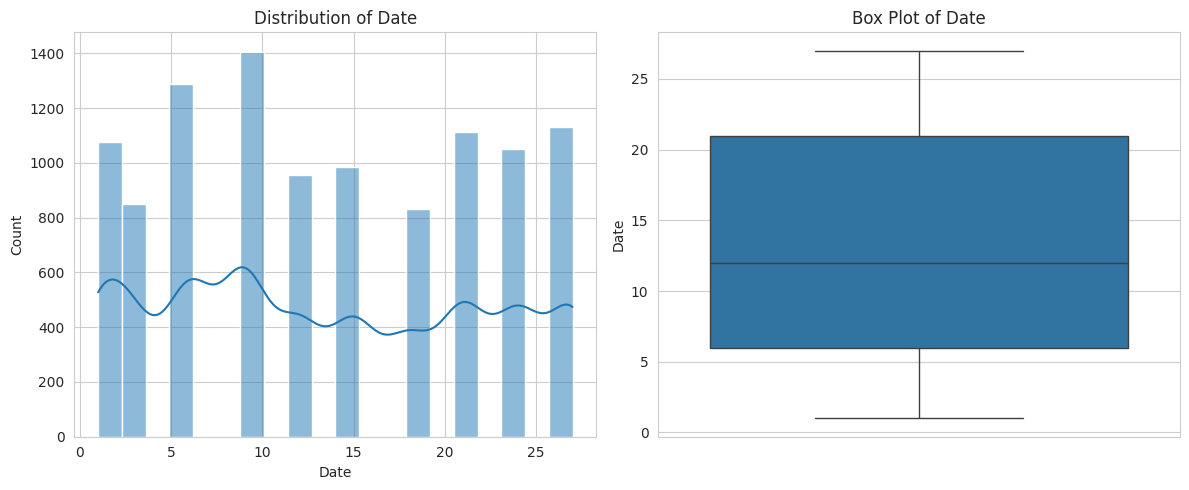

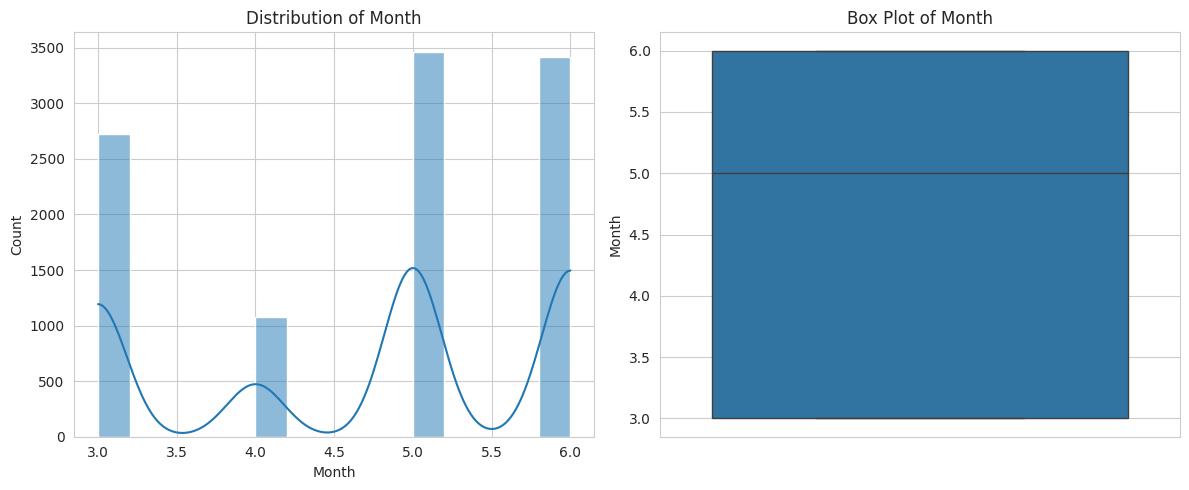

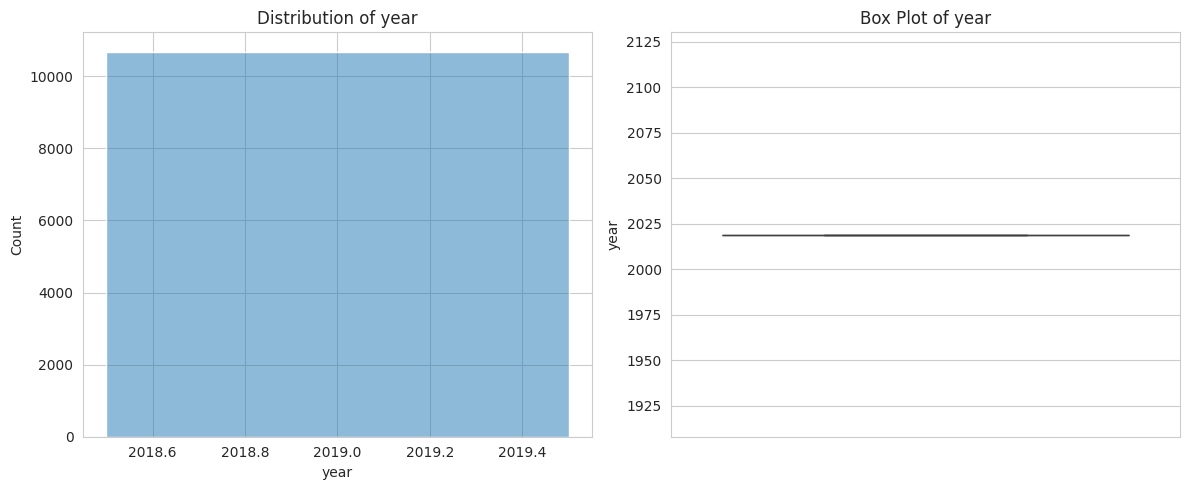

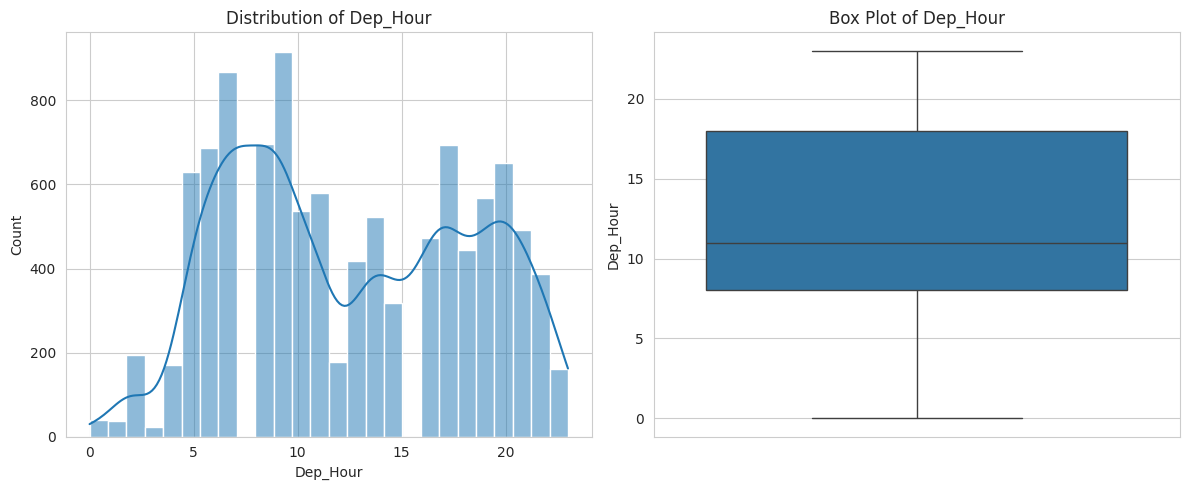

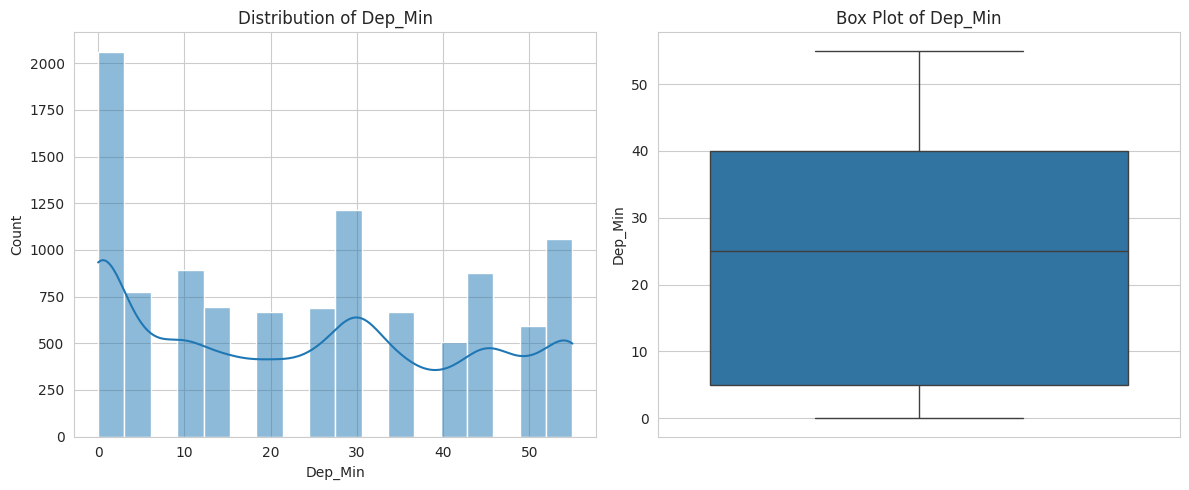

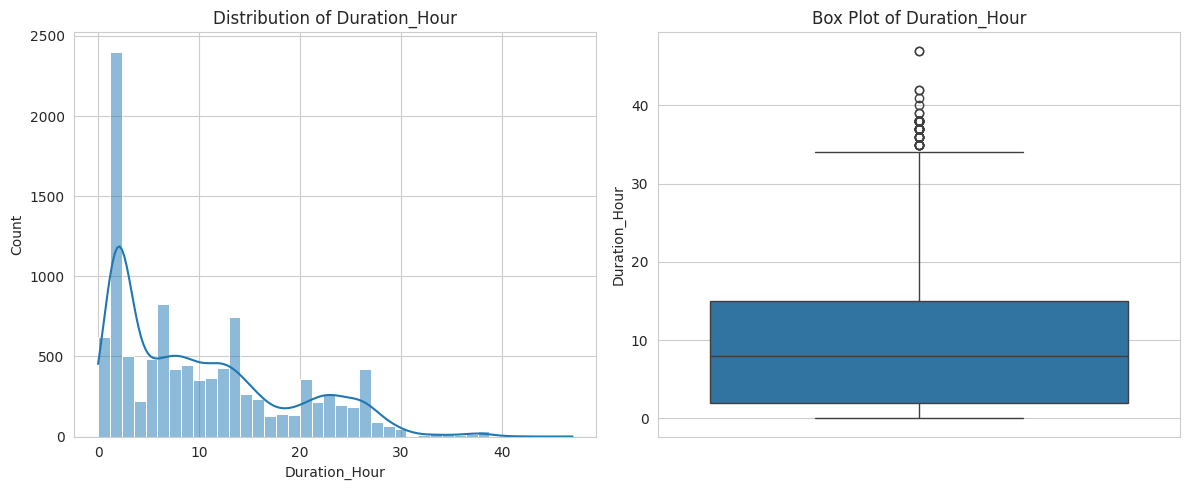

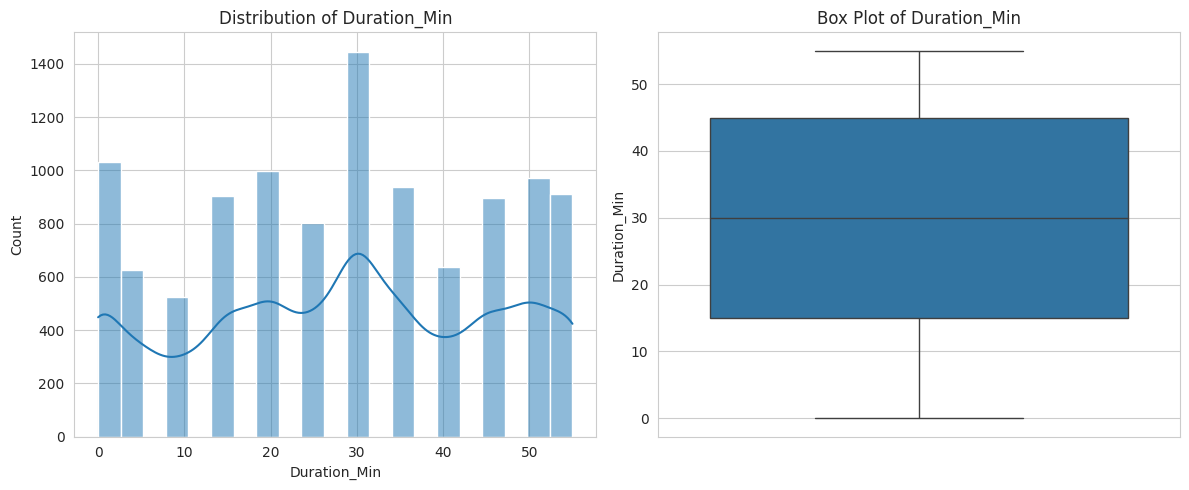

In [231]:
# Set style for plots
sns.set_style("whitegrid")

print("Visualizing numerical features:")
for column in df_copy.select_dtypes(include=['int64', 'float64']).columns:
    if column not in ['Price']:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df_copy[column], kde=True)
        plt.title(f'Distribution of {column}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_copy[column])
        plt.title(f'Box Plot of {column}')
        plt.tight_layout()
        plt.show()



Visualizing categorical features:


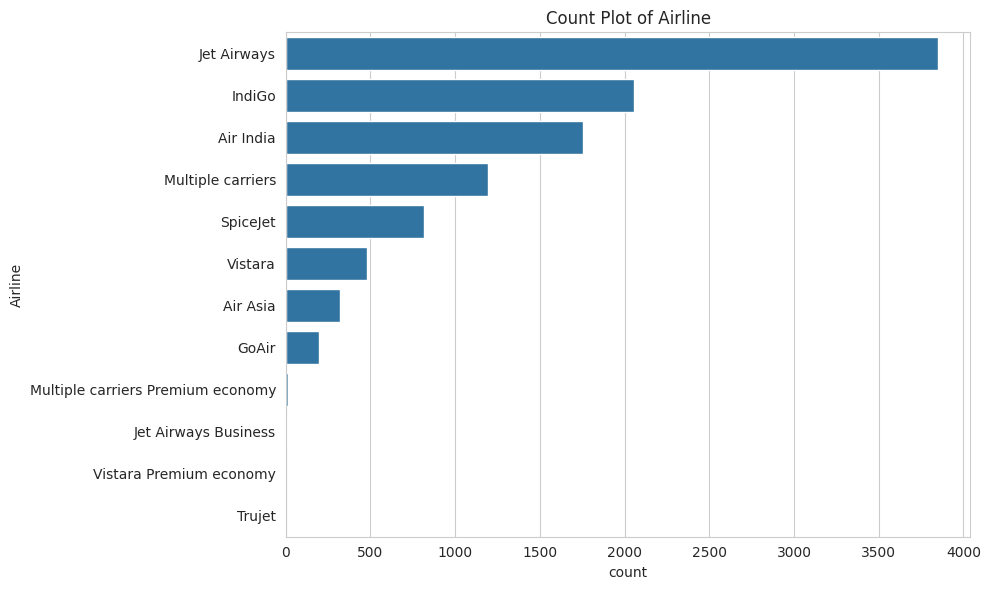

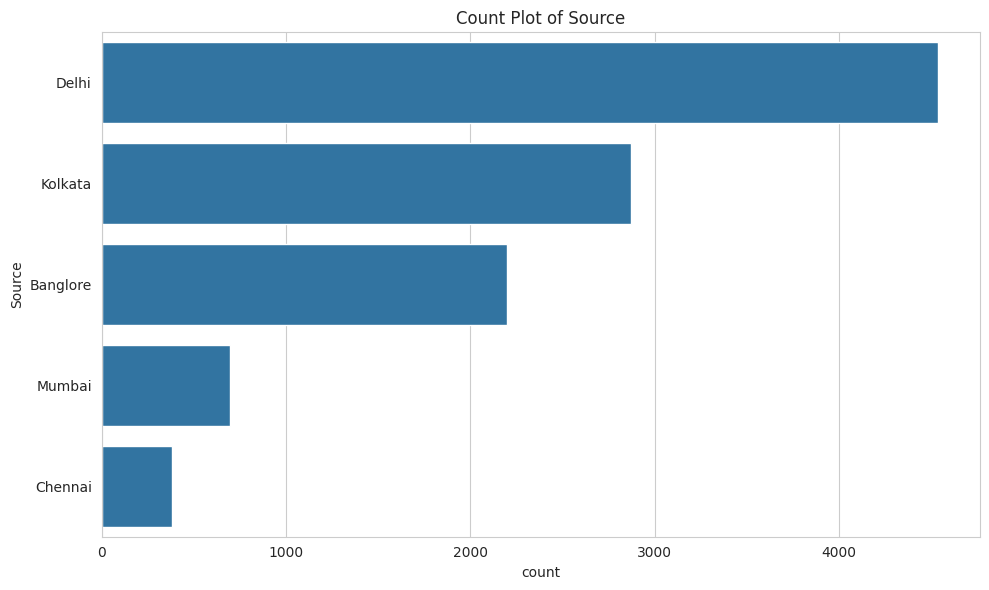

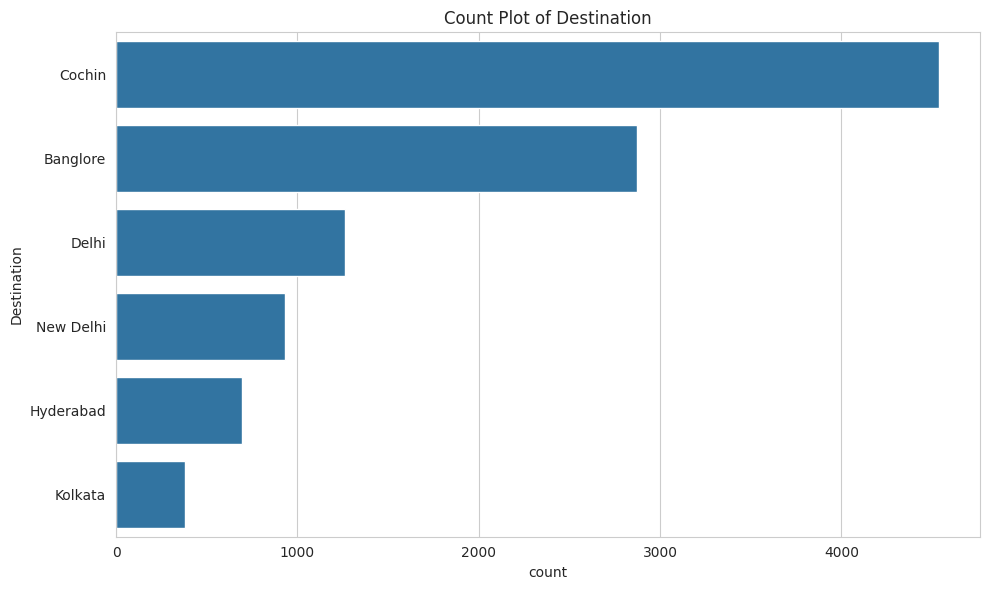

In [238]:


print("\nVisualizing categorical features:")
for column in df_copy.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_copy[column], order = df_copy[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.tight_layout()
    plt.show()


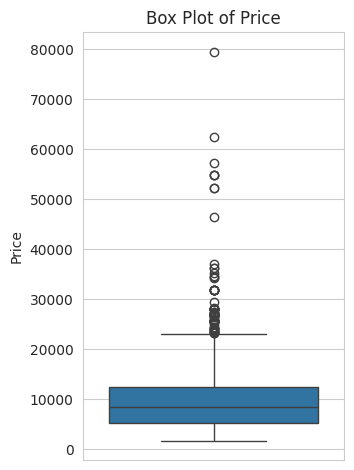

In [233]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df_copy['Price'])
plt.title('Box Plot of Price')
plt.tight_layout()
plt.show()


Visualizing Price distribution:


Text(0.5, 1.0, 'Distribution of Price')

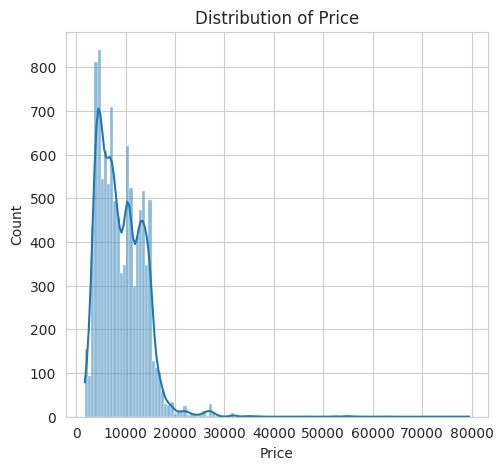

In [235]:

print("\nVisualizing Price distribution:")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_copy['Price'], kde=True)
plt.title('Distribution of Price')